## Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


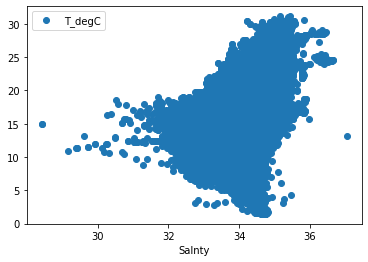

In [2]:

df = pd.read_csv("bottle.csv")
df =  df[df[['T_degC', 'Salnty']].notnull().all(1)]
df.plot(y='T_degC', x='Salnty',style='o')
x = pd.DataFrame(df['Salnty'])
y = pd.DataFrame(df['T_degC'])

In [3]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

2.666903770734468
13.146680074948216
3.625835086562572
Coefficient of determination: 0.26


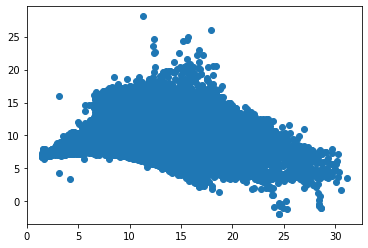

In [4]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
# Standardize the data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Transform both the training set and the test set.
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)


model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
plt.scatter(y_test, pred)

print(metrics.mean_absolute_error(y_test, pred))
print(metrics.mean_squared_error(y_test, pred))
print(np.sqrt(metrics.mean_squared_error(y_test, pred)))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred))


It seems there's no significant relationship between the water temperature and salinity. One cannot be predicted based on another. 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


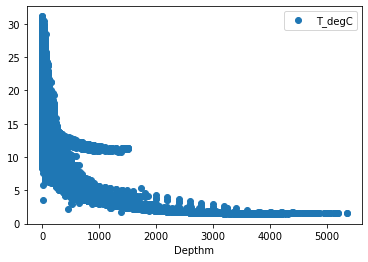

In [5]:
df = pd.read_csv("bottle.csv")
df =  df[df[['T_degC', 'Depthm']].notnull().all(1)]
df.plot(y='T_degC', x='Depthm',style='o')
x = pd.DataFrame(df['Depthm'])
y = pd.DataFrame(df['T_degC'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
# Standardize the data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Transform both the training set and the test set.
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)


from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
pred = lin2.predict(X_poly)

print("MAE: ", metrics.mean_absolute_error(y, pred))
print("MSE: ", metrics.mean_squared_error(y, pred))
print("MSRE: ",np.sqrt(metrics.mean_squared_error(y, pred)))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y, pred))

MAE:  1.6059560815435994
MSE:  4.65961915939915
MSRE:  2.1586151021891675
Coefficient of determination: 0.74
